In [51]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
#reading data using pandas

data = pd.read_csv("AQI.csv", encoding="unicode_escape")

C:\Users\mahim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [53]:
#Performing EDA - the number of entries in each column, the type of entry in each column, etc.
data.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,01-03-1990
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,01-04-1990
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,01-04-1990
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,01-04-1990
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,01-05-1990


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [103]:
'''we see that we have 435742 entries in our dataset.
We also see that we have only two data types: float and object.
There are very few values present for pm2_5.'''

'we see that we have 435742 entries in our dataset.\nWe also see that we have only two data types: float and object.\nThere are very few values present for pm2_5.'

In [55]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [56]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [101]:
#pm2_5 has a considerable amount of null values and may not be able to contribute much to the analysis 

In [57]:
replacements = {'state': {r'Uttaranchal':'Uttarakhand', }}
data.replace(replacements, regex = True, inplace = True)

In [58]:
data['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

In [59]:
data['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [60]:
#dropping the not required rows and columns 

data = data.dropna(axis=0, subset = ['type'])
data = data.dropna(axis=0, subset = ['location'])
data = data.dropna(axis=0, subset = ['so2'])

In [61]:
data.drop(["agency","stn_code","sampling_date","location_monitoring_station"],axis=1, inplace=True)

In [62]:
data.isnull().sum()

state            0
location         0
type             0
so2              0
no2           1981
rspm         29643
spm         228178
pm2_5       386966
date             4
dtype: int64

In [63]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,01-02-1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,01-02-1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,01-02-1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,01-03-1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,01-03-1990


In [64]:
#clubbing all the types into major three

a = list(data['type'])
for i in range(0, len(data)):
    if a[i][0] == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif a[i][0] == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    

In [65]:
data['type'] = a
data['type'].value_counts()

###############################################################


Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

In [104]:
#Let us begin plotting 

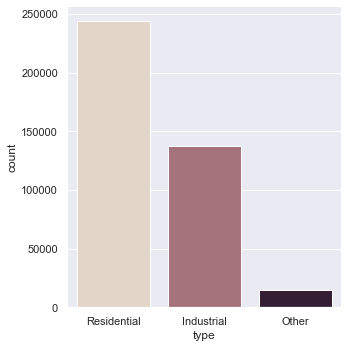

In [66]:
sns.catplot(x = "type", kind = "count", palette= "ch: 0.25", data = data)

In [105]:
#above figure suggests that major data is focused around Residential

Text(0, 0.5, 'Median so2 Emissions')

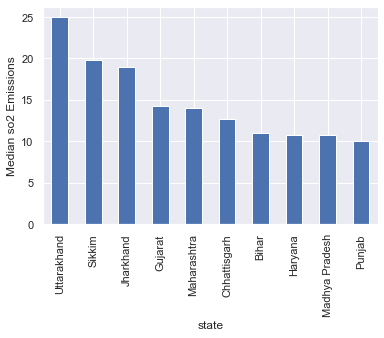

In [67]:
ax = data.groupby('state')['so2'].median().nlargest(10).plot.bar()
ax.set_ylabel('Median so2 Emissions')

Text(0, 0.5, 'Median no2 Emissions')

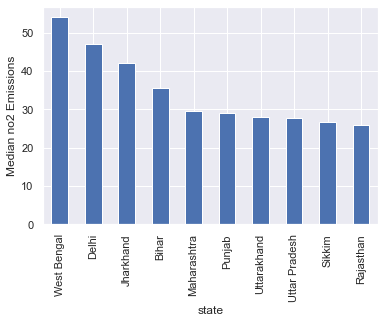

In [68]:
ax1 = data.groupby('state')['no2'].median().nlargest(10).plot.bar()
ax1.set_ylabel('Median no2 Emissions')

Text(0, 0.5, 'Median rspm Emissions')

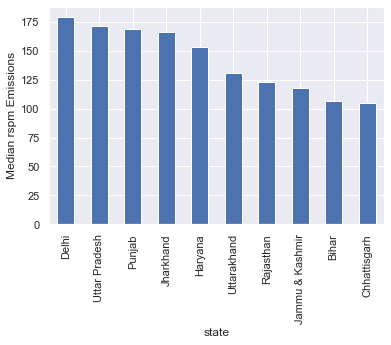

In [69]:
ax2 = data.groupby('state')['rspm'].median().nlargest(10).plot.bar()
ax2.set_ylabel('Median rspm Emissions')

Text(0, 0.5, 'Median spm Emissions')

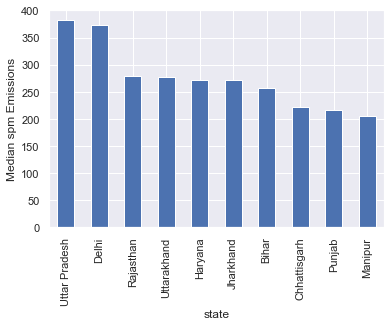

In [70]:
ax3 = data.groupby('state')['spm'].median().nlargest(10).plot.bar()
ax3.set_ylabel('Median spm Emissions')

# STATISTICAL ANALYSIS

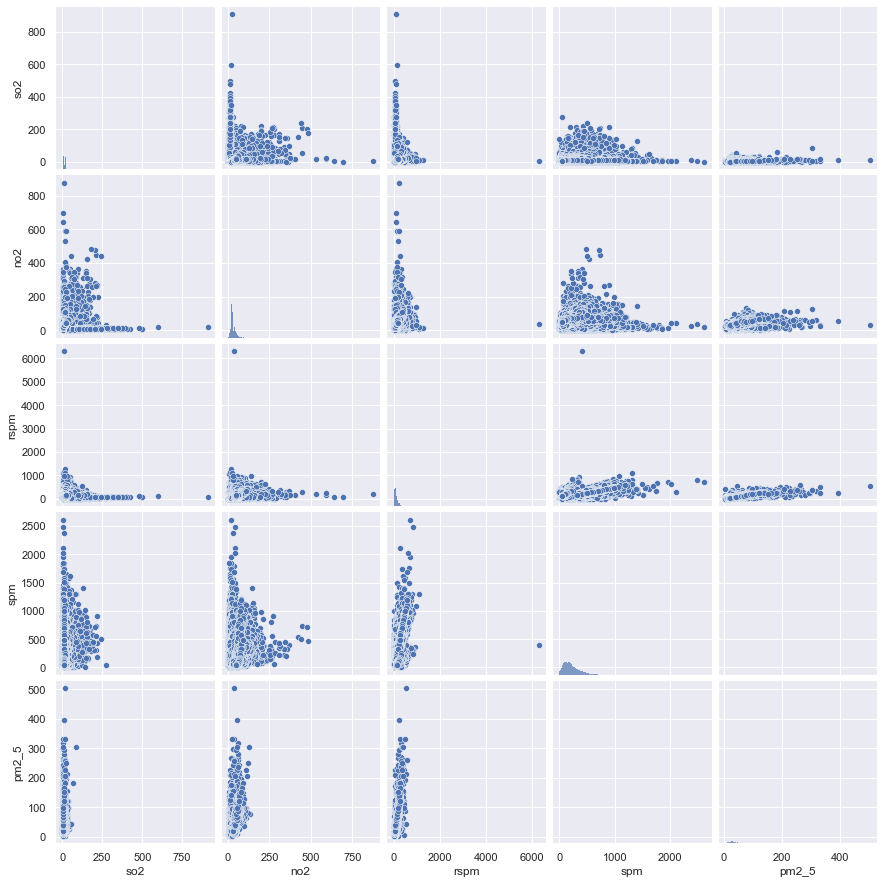

In [71]:
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(data[cols], height = 2.5)
plt.show()

In [106]:
'''It can be seen from the above scatter plot that no2 and so2 is pretty much focused around the origin, 
meaning both are low in most cases. 

Also no2 and so2 have somewhat of a similar pattern in relationship with other variables'''

'It can be seen from the above scatter plot that no2 and so2 is pretty much focused around the origin, \nmeaning both are low in most cases. \n\nAlso no2 and so2 have somewhat of a similar pattern in relationship with other variables'

<AxesSubplot:>

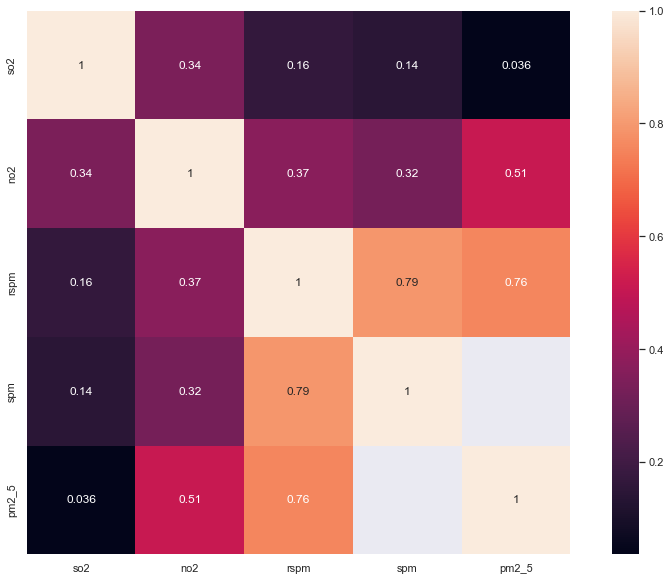

In [72]:
corrmat = data.corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmat, vmax=1, square= True, annot= True)

In [107]:
#The above graph too shows correlation between spm and rspm

In [74]:
data = data.dropna(subset=['date'])

data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data['year'] = data['date'].dt.year

data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

In [76]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


<AxesSubplot:title={'center':'so2 by state and year'}, xlabel='year', ylabel='state'>

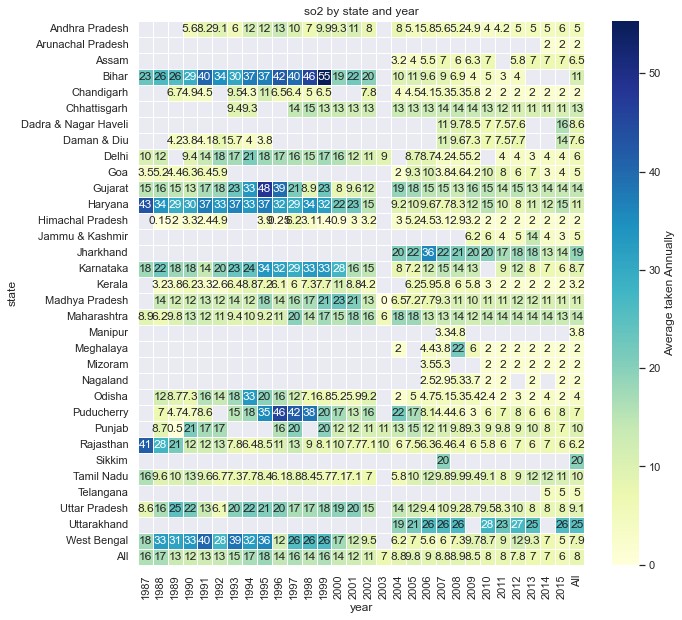

In [77]:
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(data.pivot_tab('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})


<AxesSubplot:title={'center':'no2 by state and year'}, xlabel='year', ylabel='state'>

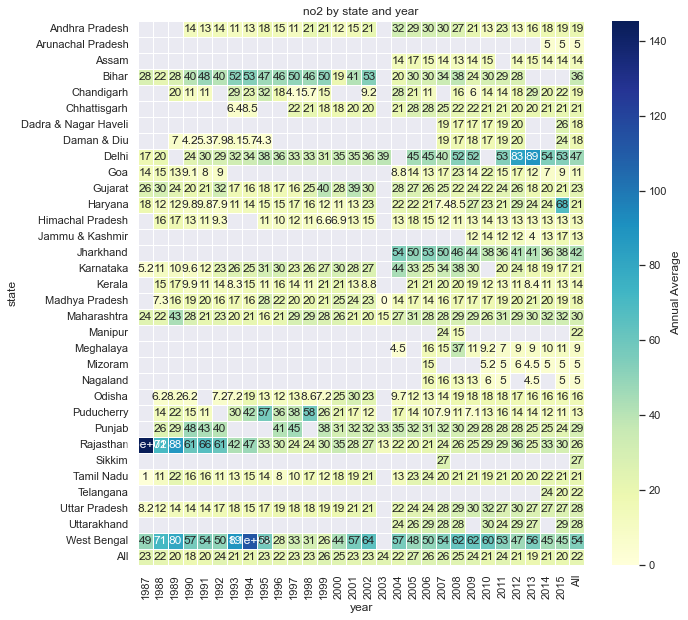

In [79]:
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(data.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

<AxesSubplot:xlabel='location'>

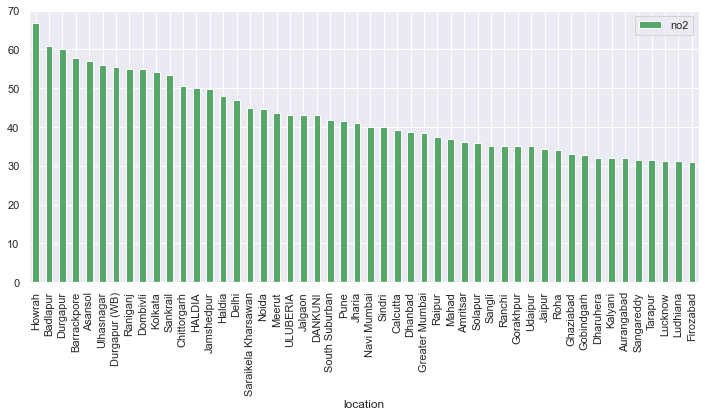

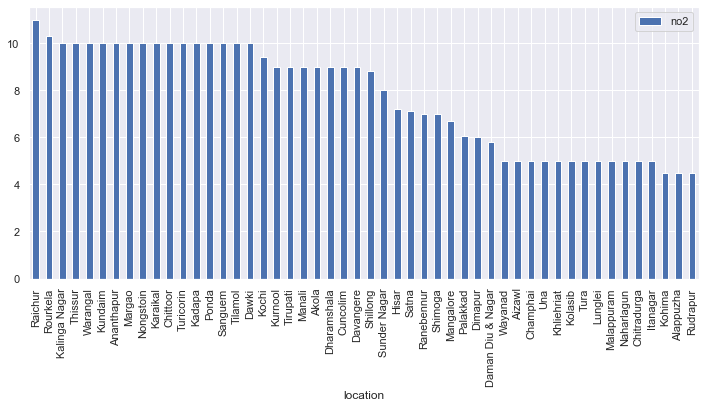

In [95]:
data[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color='g', figsize=(12,5))

data[['no2','location']].groupby(['location']).median().sort_values('no2', ascending=False).tail(50).plot.bar(color='b', figsize=(12,5))



<AxesSubplot:title={'center':'rspm by state and year'}, xlabel='year', ylabel='state'>

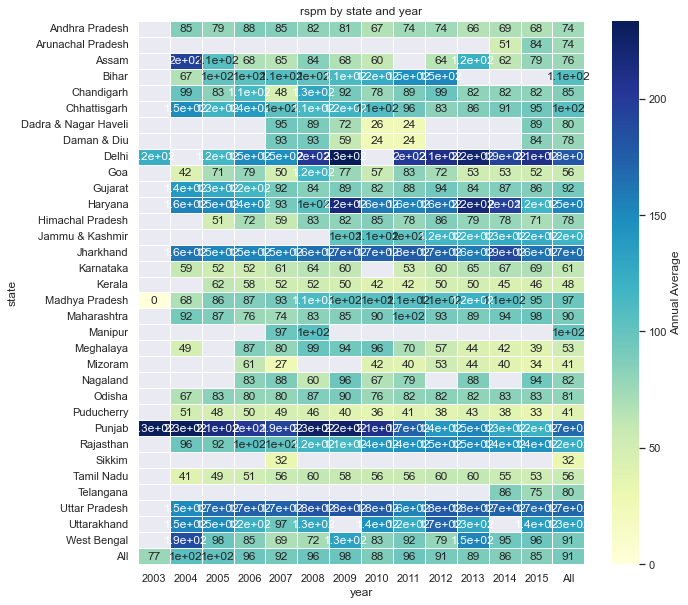

In [96]:
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(data.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

<AxesSubplot:title={'center':'spm by state and year'}, xlabel='year', ylabel='state'>

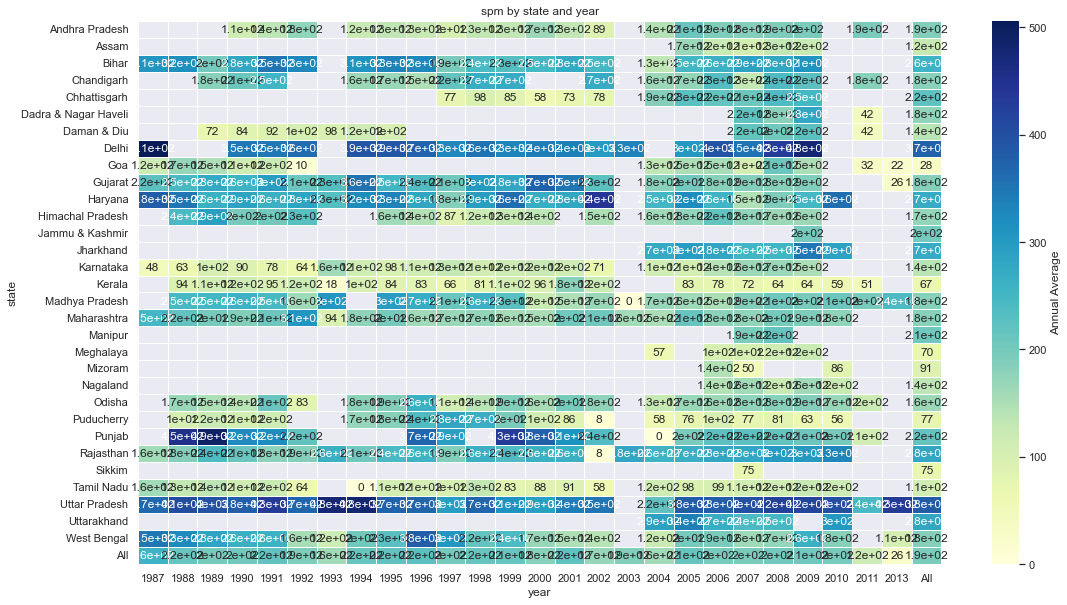

In [100]:
f, ax = plt.subplots(figsize = (18,10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(data.pivot_table('spm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

In [ ]:
''' From the above analysis, it can be concluded that the major states affected in India by air pollution belong to the northern 
region.
States like Delhi, Punjab, Uttar Pradesh, Haryana are heavily polluted and require immediate action.

We also saw that even if a state had a high level of pollutants, there were some regions in the states that were not polluted.

We also see from statistical analysis — scatter plots that the states with high rspm concentrations also have high spm 
concentrations.

From the heatmap, we conclude that some states were heavily polluted in the early stages(1980 to 2000) but, later, were 
taken care of.
